In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
dataset = pd.read_csv('/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv')
dataset.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close
917,2018-05-28,2727.360107,2714.989990,2723.600098,2721.330078,2.995260e+09,2721.330078
1411,2019-10-04,2953.739990,2918.560059,2918.560059,2952.010010,2.990830e+09,2952.010010
823,2018-02-23,2747.760010,2713.739990,2715.800049,2747.300049,3.189190e+09,2747.300049
221,2016-07-01,2108.709961,2097.899902,2099.340088,2102.949951,3.458890e+09,2102.949951
1778,2020-10-05,3409.570068,3367.270020,3367.270020,3408.600098,3.686920e+09,3408.600098
1531,2020-02-01,3282.330078,3214.679932,3282.330078,3225.520020,4.527830e+09,3225.520020
339,2016-10-27,2147.129883,2132.520020,2144.060059,2133.040039,4.204830e+09,2133.040039
690,2017-10-13,2557.649902,2552.090088,2555.659912,2553.169922,3.149440e+09,2553.169922
1122,2018-12-19,2585.290039,2488.959961,2547.050049,2506.959961,5.127940e+09,2506.959961
126,2016-03-28,2042.670044,2031.959961,2037.890015,2037.050049,2.809090e+09,2037.050049


In [ ]:
dataset['Date']  = pd.to_datetime(dataset['Date'])

In [ ]:
dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


<AxesSubplot:>

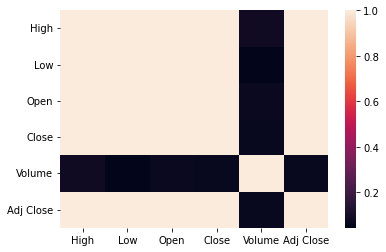

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
dataset.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

<AxesSubplot:xlabel='Date', ylabel='High'>

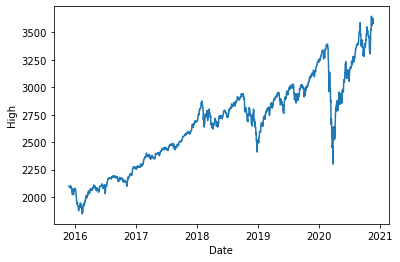

In [ ]:
sns.lineplot(x='Date',y='High',data=dataset)


# Applying ARIMA

In [ ]:
high_dataset = pd.DataFrame(data=dataset,columns=['High'])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(high_dataset, order=(4,2,0))
model_fit = model.fit()

In [ ]:
high_dataset.head()

,High
0,2095.610107
1,2094.120117
2,2093.000000
3,2093.000000
4,2093.290039


In [ ]:
y_pred = model_fit.predict(0, len(high_dataset))
print(y_pred)

0          0.000000
1       3143.420652
2       2093.474317
3       2092.119783
4       2092.408034
           ...     
1821    3639.239218
1822    3633.267262
1823    3624.214459
1824    3581.675246
1825    3576.855096
Name: predicted_mean, Length: 1826, dtype: float64


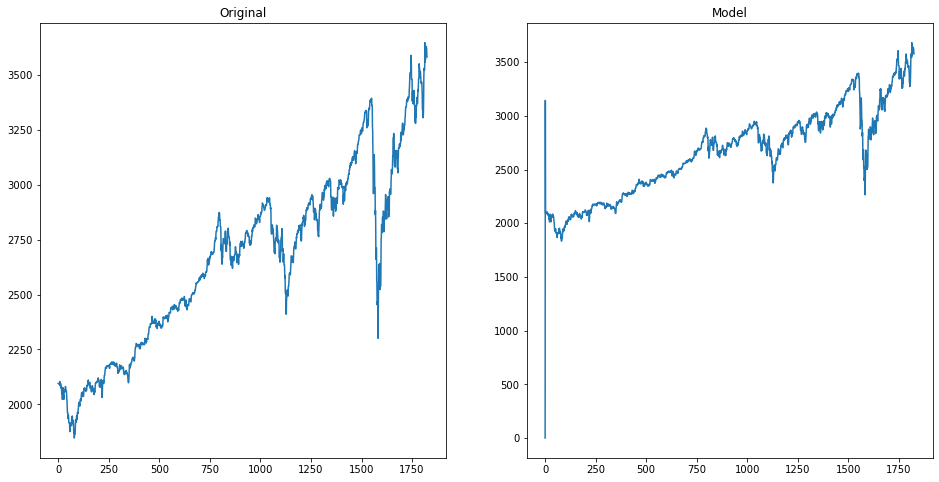

In [ ]:
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
plt.title('Original')
plt.plot(high_dataset)
plt.subplot(1,2,2)
plt.title('Model')
plt.plot(y_pred)